# Влияние разницы в ставках по ипотеке на первичном и вторичном рынке на выдачи ипотечных кредитов на первичном рынке недвижимости

## Краткое описание

### Цели и задачи

Льготные ипотечные программы появились в России сравнительно недавно. В 2018 году появилась семейная ипотека, которая изначально была доступна только тем семьям, в которых после 1 января 2018 года родился второй или последующий ребёнок. Затем льготная ипотека в России была расширена на больший круг заемщиков для стимулирования строительства и продаж жилья во время пандемии COVID-19, что поддержало экономику в кризисный период. При этом многие исследователи утверждают, что большая часть кредитов и так была бы выдана по рыночным ставкам, то есть если бы не существовало  субсидируемой программы, то выдачи остались бы на высоком уровне. Отсюда вытекает вопрос об оценке дополнительного вклада льготных программ в продажи на первичном рынке. В данной работе мы представим несколько подходов к исследованию данного вопроса.

**Основные цели данного исследования:**

- Оценить как льготные программы повлияли на выдачу ипотеки на первичном рынке
- Определить чувствительность спроса к разнице в процентных ставках на первичном и вторичном рынке

### План

**Необходимо:**
- Представить основную идею метода исследования
- Провести первичное знакомство с данными
- Оценить модели, удовлетворяющие предпосылкам исследования
- Сделать вывод по результатам исследования

### Описание данных ###
Мы будем использовать два датасета: *chng_data*, *abs_data*
- *chng_data:*
  - *pr_marg_yoy_3mma* - прирост выданных ипотечных кредитов на первичном рынке год к году скользящим средним размером окна в 3 месяца
  - *sec_marg_yoy_3mma* - прирост выданных ипотечных кредитов на вторичном рынке год к году скользящим средним размером окна в 3 месяца
  - *ddu_rate* - ставка по ипотеке на первичном рынке
  - *dkp_rate* - ставка по ипотеке на вторичном рынке
  - *wedge* - разница в ставках на первичном и вторичном рынках
  - *wedge_pre_prgrm* - разница в ставках вызванная семейной ипотекой
  - *wedge_post_prgrm* - разница в ставках вызванная льготной ипотекой

- *abs_data:*
  - *ddu_count* - число выданных ипотечных кредитов на первичном рынке
  - *dkp_count* - число выданных ипотечных кредитов на вторичном рынке
  - *ddu_rate* - ставка по ипотеке на первичном рынке
  - *dkp_rate* - ставка по ипотеке на вторичном рынке
  - *wedge* - разница в ставках на первичном и вторичном рынках
  - *wedge_pre_prgrm* - разница в ставках вызванная семейной ипотекой
  - *wedge_post_prgrm* - разница в ставках вызванная льготной
  - *ddu_count_sa* - сезонно-сгаженный ряд числа выданных ипотечных кредитов на первичном рынке
  - *dkp_count_sa* - сезонно-сгаженный ряд числа выданных ипотечных кредитов на вторичном рынке

## Описание идеи

Для понимания идеи необходимо разобраться в том, что такое льготная ипотека. При некотором упрощении, можно сказать, что это скидка на процентную ставку. Заемщик приобретает кредит по льготной ставке, а разницу между льготной и рыночной ипотечной ставкой банкам возмещает государство. При таких условиях средняя ставка на первичном рынке (льготные программы распространяются именно на него) становится ниже по сравнению со средней ставкой на вторичном рынке и появляется разница в ставках. Чем больше людей пользуются льготными программами тем выше эта разница, которая также увеличивается и при увеличении ключевой ставки. Таким образом, используя разницу в ставках, мы можем предположить, что она хорошо описывает влияние льготных ипотечных программ (семейная ипотека, льготная ипотека) на приобретение жилья на первичном рынке. Но тут же появляется другая проблема.

Для того чтобы оценить чувстительность выдачи ипотечных кредитов к разнцие в ставках на первичном и вторичном рынках необходимо учитывать, что на выдачи одновременно также влияют и другие факторы, например, потребительская уверннность, ключевая ставка, курс валют, макроэкономические условия и фазы делового цикла, и отделить это влияние от разницы в процентных ставках.

В данной работе мы пользуемся методом, который предложил Александр Исаков в одном из своих исследований. Так, автор предполагает, что на выдачу ипотек на первичном и вторичном рынке влияют одинаковые факторы, а значит прорегрессировав одно значение на другое можно очистить влияние всех ранее перечисленных факторов. То есть предполагается, что продажи на первичном и вторичном рынке одинаково зависят от текущей конъюнктуры, а значит мы можем исключить такое влияние.

Разница, которая возникает между ставками на первичном и вторичном рынке зависит как от льготной ипотеки, так и от семейной ипотеки. В своем исследовании авторы фиксируют влияние семейной ипотеки на уровне 1,3% с момента введения льготной ипотеки.



## Обзор данных

In [71]:
# загрузим нужные для исследования библиотеки
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import warnings

from statsmodels.regression.rolling import RollingOLS

warnings.filterwarnings("ignore")

In [72]:
# красивое отображение нижней оси
def beautiful_xticks(ax, data):
    ticklabels = ['']*len(data.index)
    ticklabels[::4] = [item.strftime('%b %d') for item in data.index[::4]]
    ticklabels[::12] = [item.strftime('%b %d\n%Y') for item in data.index[::12]]
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
    plt.gcf().autofmt_xdate()
    plt.show()

In [73]:
# графики декомпозиций
def decompos_plot(result,
                  data,
                  color = ['#ed783e', '#3eb0ed', '#8acf9e','#912b26', '#2d6cba']):
    for_plot = pd.DataFrame(result.params * data)
    for_plot['resid'] = result.resid
    ax = for_plot.plot(figsize = (13,10),
                  kind='bar',
                  stacked=True,
                  width=0.9,
                  rot=0,
                  color=color);
                  #colormap='Spectral')
    beautiful_xticks(ax, for_plot)

In [74]:
# графики вкаладов
def explanation(result, data, i):
    for_plot = pd.concat((np.array(result.params) * data, result.resid),axis=1)
    ax = (abs(for_plot[i]) / for_plot.abs().sum(axis=1)).plot(kind='bar',
                                                figsize=(20,10),
                                                width=0.85,
                                                color='#8acf9e');
    beautiful_xticks(ax, for_plot)

In [75]:
# загрузка данных
try:
    chng_data = pd.read_excel('data_sa.xlsx',
                              sheet_name='Лист1')
except:
    raise FileNotFoundError('Загрузите собственный путь к файлу проекта')
chng_data.head(5)

,date,pr_marg_yoy_3mma,sec_marg_yoy_3mma,ddu_rate,dkp_rate,wedge,wedge_pre_prgrm,wedge_post_prgrm
0,2017-03-31,-0.211849,0.134373,0.1134,0.118263,0.004863,0.004863,0.0
1,2017-04-30,-0.136731,0.107805,0.1098,0.116368,0.006568,0.006568,0.0
2,2017-05-31,0.132595,0.200593,0.1091,0.115082,0.005982,0.005982,0.0
3,2017-06-30,0.164027,0.246342,0.1071,0.112583,0.005483,0.005483,0.0
4,2017-07-31,0.164392,0.330823,0.1053,0.111042,0.005742,0.005742,0.0


In [76]:
# описательная статистика
chng_data.iloc[:,1:].describe()

,pr_marg_yoy_3mma,sec_marg_yoy_3mma,ddu_rate,dkp_rate,wedge,wedge_pre_prgrm,wedge_post_prgrm
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,0.163218,0.270157,0.073677,0.095466,0.021788,0.009344,0.012444
std,0.394895,0.603422,0.022325,0.009390,0.019011,0.004232,0.016120
min,-0.577040,-0.752891,0.034900,0.078878,0.000284,0.000284,0.000000
25%,-0.105476,-0.114335,0.058450,0.089245,0.005400,0.005400,0.000000
50%,0.083347,0.189285,0.062400,0.096683,0.019789,0.012662,0.007127
75%,0.258837,0.520892,0.094850,0.100209,0.034669,0.012662,0.022007
max,1.318354,2.978329,0.113400,0.118263,0.070754,0.013788,0.058092


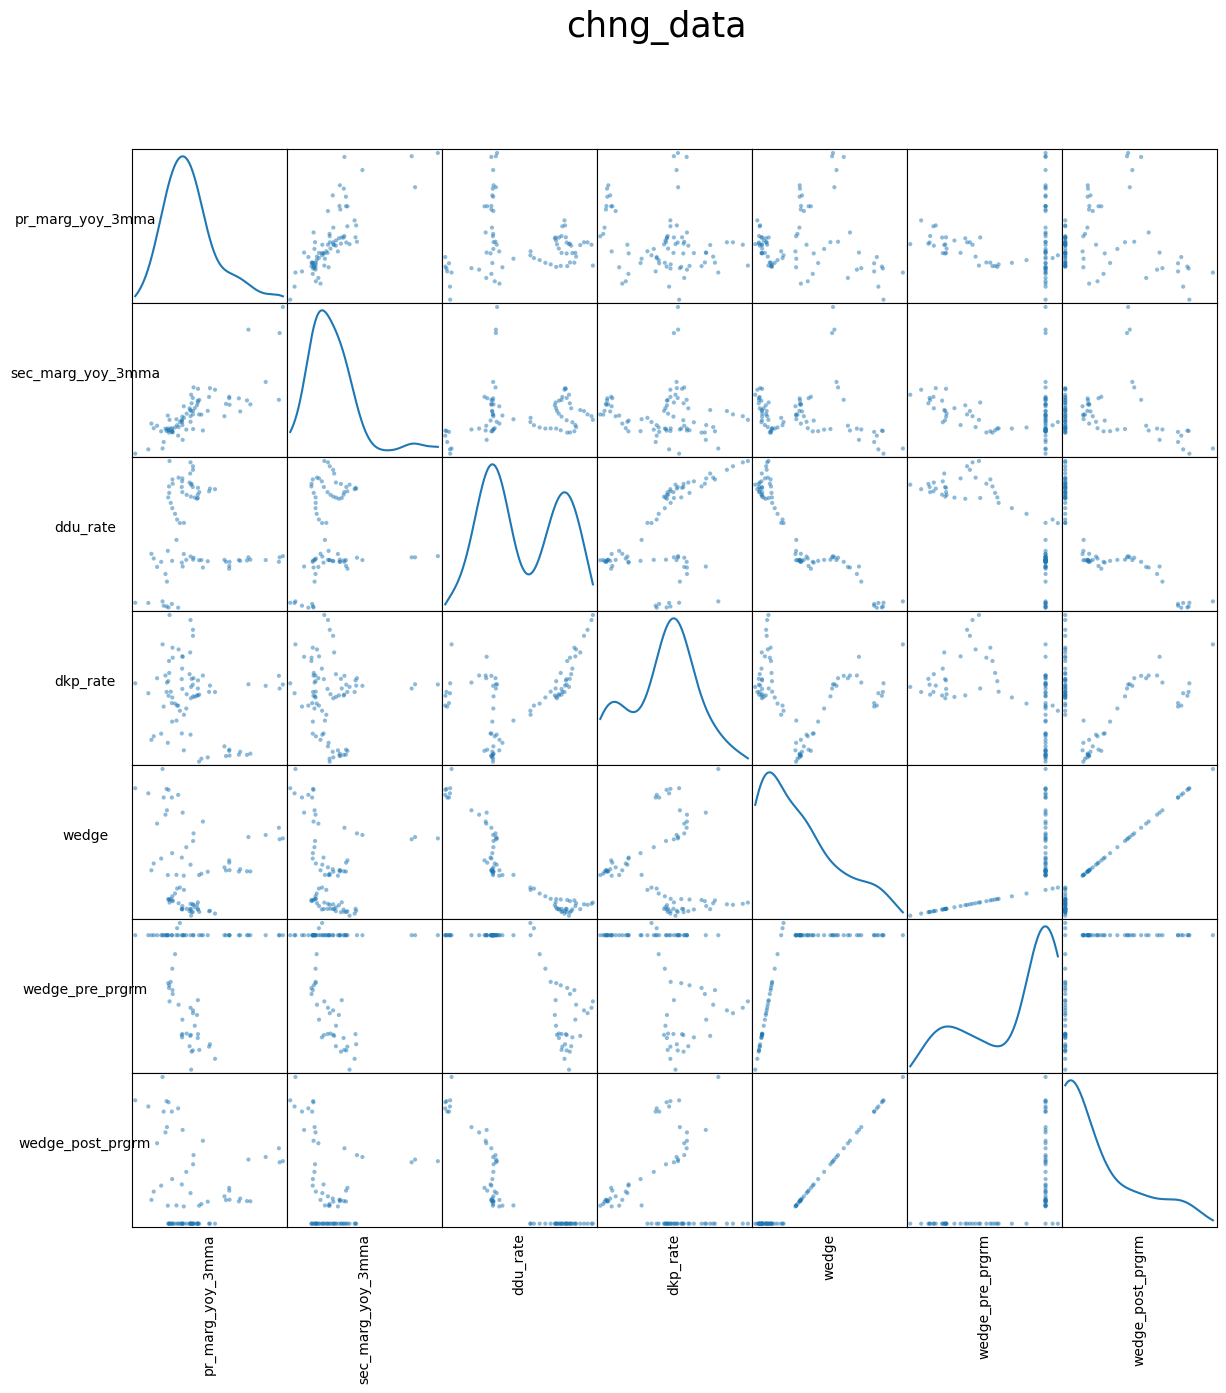

In [77]:
# распределение величин и графики совместной зависимости
scat = pd.plotting.scatter_matrix(chng_data.iloc[1:], figsize=(14,14), diagonal='kde');
[s.xaxis.label.set_rotation(90) for s in scat.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in scat.reshape(-1)]
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in scat.reshape(-1)]
[s.set_xticks(()) for s in scat.reshape(-1)]
[s.set_yticks(()) for s in scat.reshape(-1)]

plt.suptitle('chng_data', fontsize=25)
plt.show()

In [78]:
# загрузка данных
try:
    abs_data = pd.read_excel('data_sa.xlsx',
                             sheet_name='Лист2')
except:
    raise FileNotFoundError('Загрузите собственный путь к файлу проекта')
abs_data.head(5)

,date,ddu_rate,ddu_count,dkp_count,dkp_rate,wedge,wedge_pre_programm,wedge_post_programm,ddu_count_sa,dkp_count_sa
0,2016-01-31,0.1132,15565,21580,0.133511,0.020311,0.020311,0.0,24763.16,63699.79
1,2016-02-29,0.1121,40160,40067,0.130121,0.018021,0.018021,0.0,45394.51,57879.28
2,2016-03-31,0.1170,23353,47724,0.134723,0.017723,0.017723,0.0,22954.74,52493.31
3,2016-04-30,0.1202,21517,51159,0.132985,0.012785,0.012785,0.0,22096.75,54651.31
4,2016-05-31,0.1210,19187,42391,0.135236,0.014236,0.014236,0.0,23287.01,56461.19


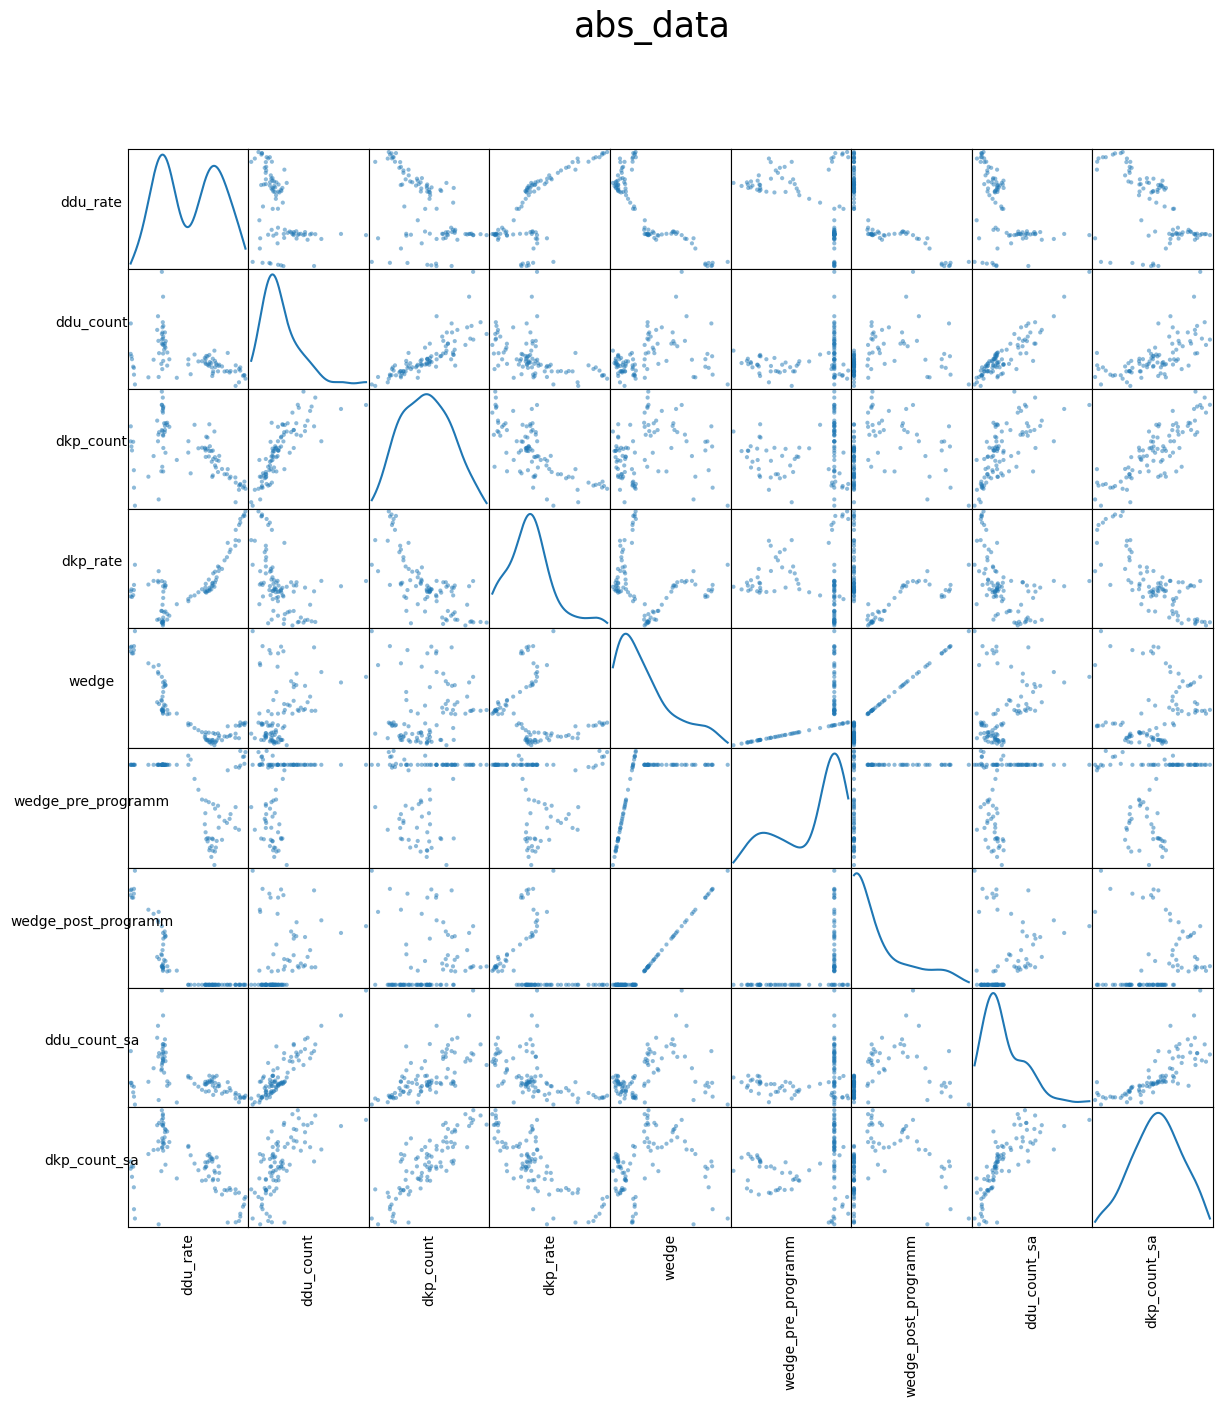

In [79]:
# распределение величин и графики совместной зависимости
scat = pd.plotting.scatter_matrix(abs_data.iloc[3:], figsize=(14,14), diagonal='kde');
[s.xaxis.label.set_rotation(90) for s in scat.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in scat.reshape(-1)]
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in scat.reshape(-1)]
[s.set_xticks(()) for s in scat.reshape(-1)]
[s.set_yticks(()) for s in scat.reshape(-1)]

plt.suptitle('abs_data', fontsize=25)
plt.show()

## Репликация исследования Александра Исакова

Идея данной модели уже была описана выше. С математичекской точки зрения она выглядит следующим образом:
$$pr{\_}marg{\_}yoy{\_}_3mma_i = \beta^0 + \beta^1 * sec{\_}marg{\_}yoy{\_}3mma_i + \beta^2 * wedge{\_}pre{\_}prgrm_i + \beta^3 * wedge{\_}post{\_}prgrm_i + \xi_i$$
Приступим к ее реализации


In [80]:
# выделяем года в качестве фиктивных переменных
chng_data['year'] = chng_data['date'].dt.year
chng_data = pd.concat((chng_data, pd.get_dummies(chng_data['year'])), axis=1)
chng_data.drop('year', inplace=True, axis=1)

In [81]:
# добавляем лаг и константу
chng_data = chng_data.set_index('date')
chng_data = sm.add_constant(chng_data, prepend=False)
chng_data['pr_marg_yoy_3mma_lag'] = chng_data['pr_marg_yoy_3mma'].shift(1)
chng_data.dropna(inplace=True)

In [82]:
# создаем переменные wedge*year
for i in range(7,14):
    chng_data.iloc[:,i] = chng_data.iloc[:,i] * chng_data.loc[:,'wedge']

In [83]:
chng_data.head(5)

,pr_marg_yoy_3mma,sec_marg_yoy_3mma,ddu_rate,dkp_rate,wedge,wedge_pre_prgrm,wedge_post_prgrm,2017,2018,2019,2020,2021,2022,2023,const,pr_marg_yoy_3mma_lag
date,,,,,,,,,,,,,,,,
2017-04-30,-0.136731,0.107805,0.1098,0.116368,0.006568,0.006568,0.0,0.006568,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.211849
2017-05-31,0.132595,0.200593,0.1091,0.115082,0.005982,0.005982,0.0,0.005982,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.136731
2017-06-30,0.164027,0.246342,0.1071,0.112583,0.005483,0.005483,0.0,0.005483,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.132595
2017-07-31,0.164392,0.330823,0.1053,0.111042,0.005742,0.005742,0.0,0.005742,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.164027
2017-08-31,0.128661,0.356536,0.1034,0.106795,0.003395,0.003395,0.0,0.003395,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.164392


### Модель на укороченных данных

Здесь мы используем аналогичные оригинальному исследованию данные и временной промежуток

In [84]:
# ограничиваем выборку
shortened = chng_data.loc[:'2021-03-01']

In [85]:
# модель, робастные стандартные ошибки
model = sm.OLS(shortened['pr_marg_yoy_3mma'],
               shortened[['sec_marg_yoy_3mma',
                     'wedge_pre_prgrm',
                     'wedge_post_prgrm',
                     'const']])

result = model.fit()
print(result.get_robustcov_results(cov_type='HC1').summary())

                            OLS Regression Results                            
Dep. Variable:       pr_marg_yoy_3mma   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     39.25
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           2.23e-12
Time:                        11:52:57   Log-Likelihood:                 26.669
No. Observations:                  47   AIC:                            -45.34
Df Residuals:                      43   BIC:                            -37.94
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
sec_marg_yoy_3mma     0.6421      0.09

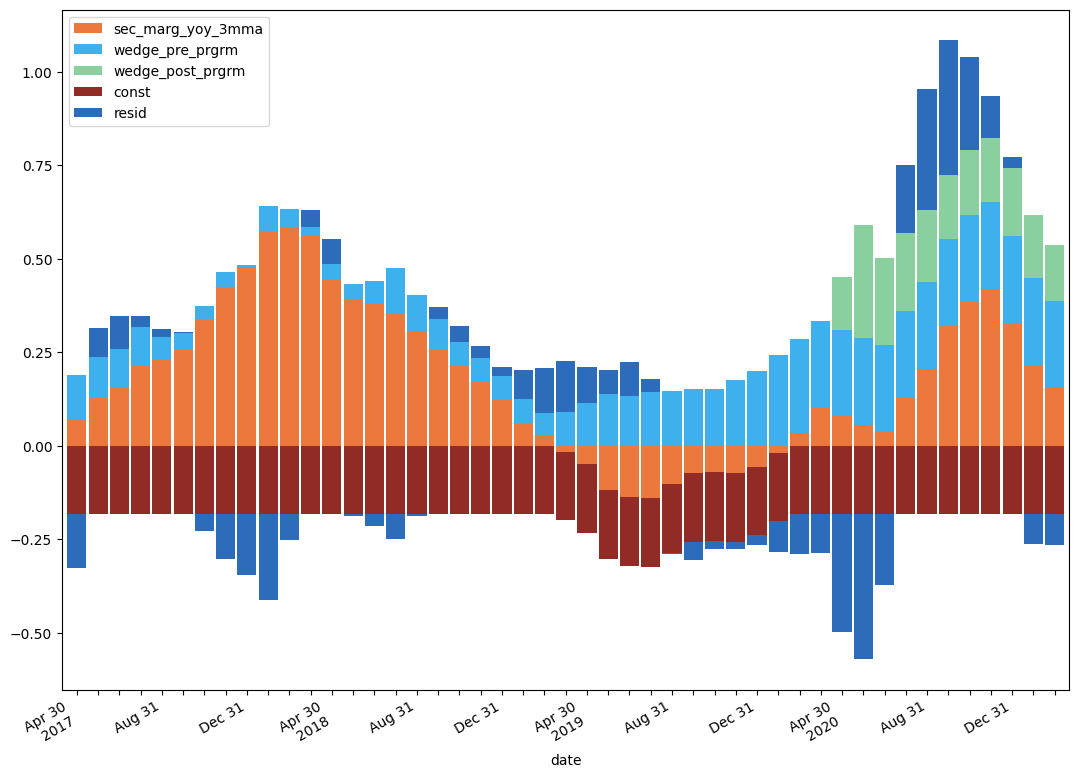

In [86]:
decompos_plot(result, shortened[['sec_marg_yoy_3mma',
                     'wedge_pre_prgrm',
                     'wedge_post_prgrm',
                     'const']])

Получилось, что льготная ипотека внесла вклад ~ 20% выдач от общего числа кредитов. Семейная ипотека объясняет около 25%.

Мы можем заметить, что наша декомпозиция практически идентична той, что была использована в раннем исследовании

P.S. *В нашей оценке мы использовали устойчивые к гетеороскедастичности(изменение дисперсии данных с течением времени) стандартные ошибки коэффициентов и коэффииент при переменной эффекта от льготных программ стал незначимым. В основной работе об этом не упоминается*

### Модель на дополненных  данных

Теперь оценим ту же самую модель, но на всех доступных данных

In [87]:
# модель, робастные стандартные ошибки
model = sm.OLS(chng_data['pr_marg_yoy_3mma'],
               chng_data[['sec_marg_yoy_3mma',
                     'wedge_pre_prgrm',
                     'wedge_post_prgrm',
                     'const']])

result = model.fit()
print(result.get_robustcov_results(cov_type='HC1').summary())

                            OLS Regression Results                            
Dep. Variable:       pr_marg_yoy_3mma   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     37.20
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           9.09e-15
Time:                        11:52:59   Log-Likelihood:                 4.8743
No. Observations:                  78   AIC:                            -1.749
Df Residuals:                      74   BIC:                             7.678
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
sec_marg_yoy_3mma     0.5252      0.05

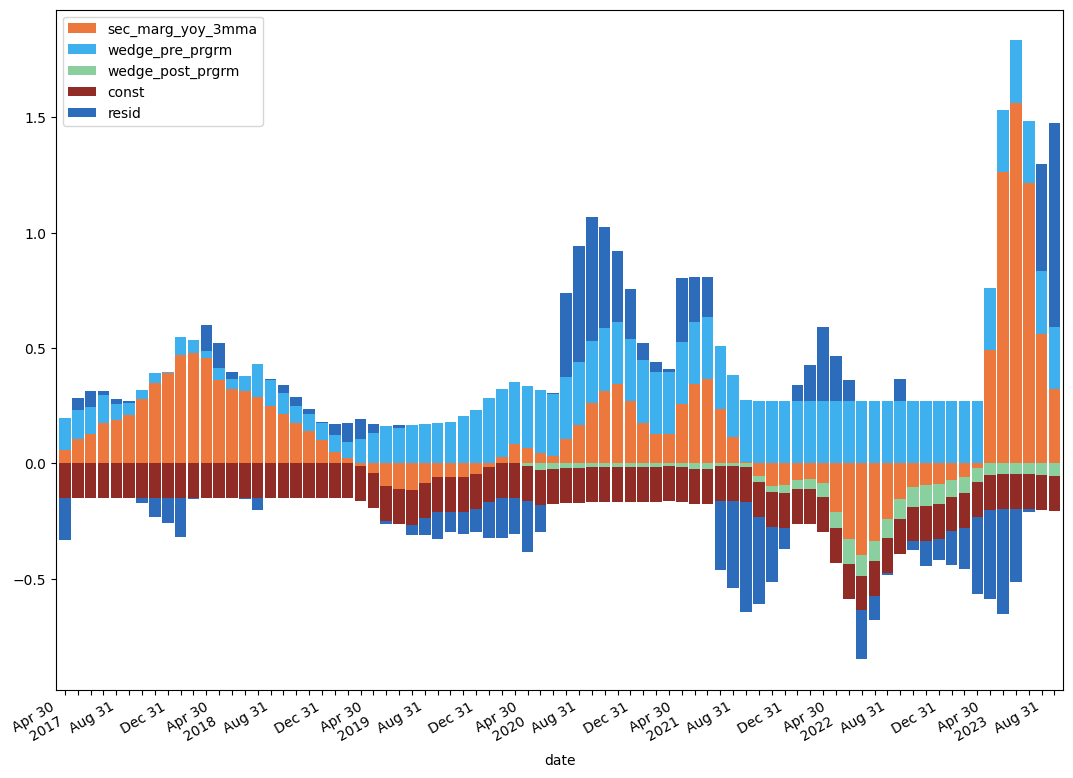

In [88]:
decompos_plot(result, chng_data[['sec_marg_yoy_3mma',
                     'wedge_pre_prgrm',
                     'wedge_post_prgrm',
                     'const']])

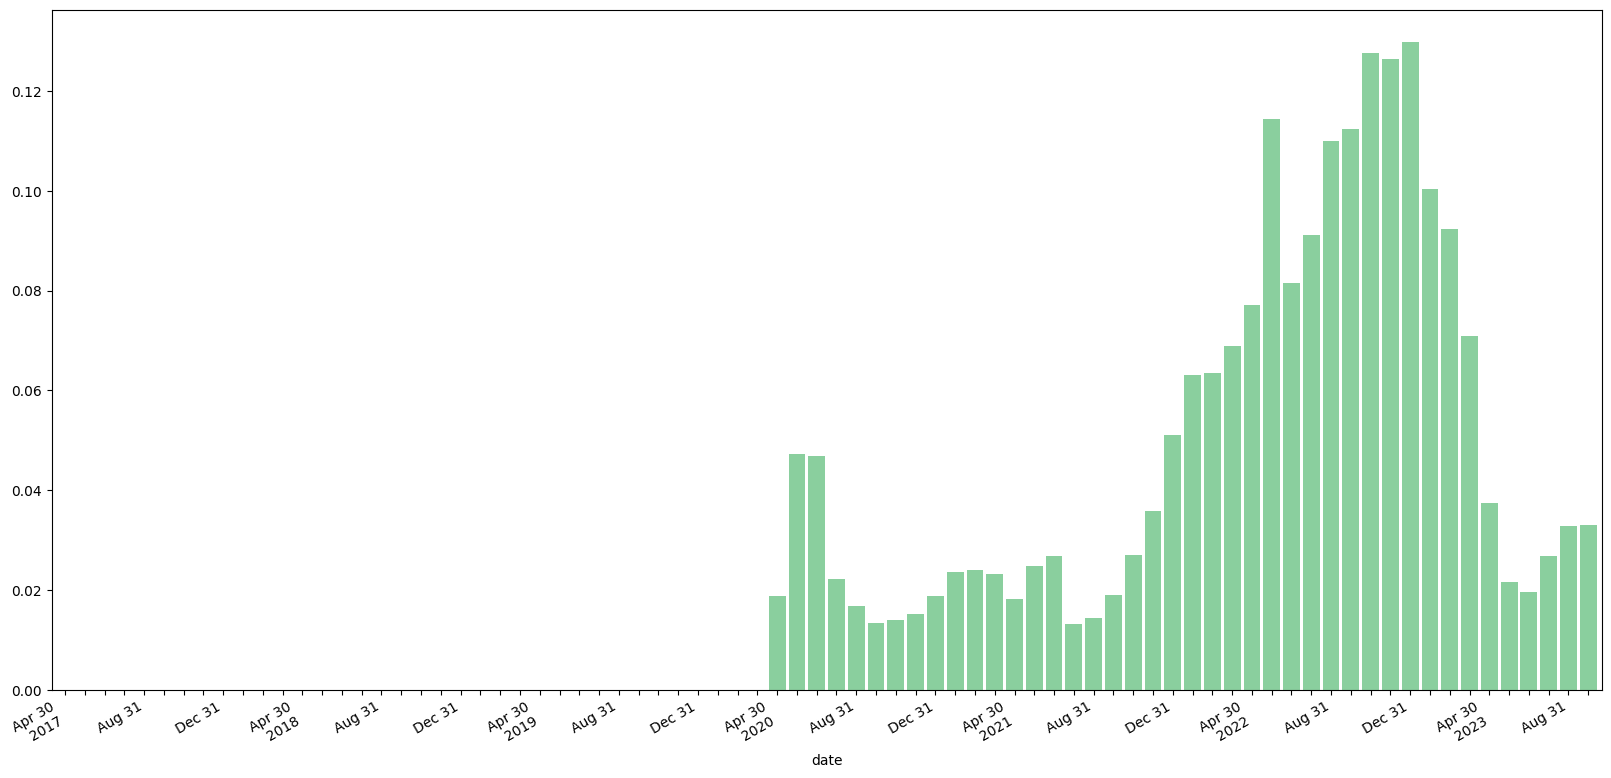

In [89]:
# доля объясняемая введением программы
explanation(result, chng_data[['sec_marg_yoy_3mma',
                     'wedge_pre_prgrm',
                     'wedge_post_prgrm',
                     'const']], 'wedge_post_prgrm')

На полных данных можно заметить что результаты модели значительно меняются. Во-первых, вклад льготных программ в изменение выдач снижается. Во-вторых он отрицательный, что не соответствует базовой логике. Такое возможно по нескольким причинам:
- Ошибки спецификации модели. Модели с изменениями год к году с устойчивой автокорреляцией могут показывать смещенные оценки.
- Несовершенство предпосылок. Мы уже ранее упоминали, что даже в первоначальной статье оценки были незначимыми.
- Структурные изменения. Структура зависимостей могла поменяться с течением времени и модель выполненная на всем объеме данных не способна учесть этих изменений. Особенно актуально для РФ со структурными изменениями в периоды пандемии и СВО.

Поэтому в рамках поставленной цели попробуем использовать другие модели с различными спецификациями.

## Модель с годовыми приростами  и фиктивными переменными года

Рассмотрим модель вида:
$$pr{\_}marg{\_}yoy{\_}_3mma_i = \beta^0 + \beta^1 * sec{\_}marg{\_}yoy{\_}3mma_i + \beta^2 * wedge_i + \beta^3 * wedge_i * 2017_i + \beta^4 * wedge_i * 2020_i + \beta^5 * wedge * 2021_i+ \beta^6 * wedge * 2022_i+ \beta^7 * wedge * 2023_i + \xi_i$$

где 2017, 2020, 2021, 2022, 2023 - фиктивные переменные года

В данной модели мы предполагаем, что разница в ставках оказывает некоторое постоянное влияние, а также влияние, которое меняется со временем

In [90]:
# модель, робастные стандартные ошибки
# можем менять зависимые переменные
model = sm.OLS(chng_data['pr_marg_yoy_3mma'],
               chng_data[['sec_marg_yoy_3mma',
                     'wedge',
                     'const',
                     2017,2020,2021,2022,2023]])

result = model.fit()
print(result.get_robustcov_results(cov_type='HC1').summary())
#print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       pr_marg_yoy_3mma   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     27.49
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           9.54e-18
Time:                        11:53:01   Log-Likelihood:                 9.3276
No. Observations:                  78   AIC:                            -2.655
Df Residuals:                      70   BIC:                             16.20
Df Model:                           7                                         
Covariance Type:                  HC1                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
sec_marg_yoy_3mma     0.5420      0.06

Фиктивные переменные года не способны объяснить влияние разницы в ставках на выдачу ипотеки. Возможно разница в ставках все же не оказывает влияния? Это врядли. Скорее всего структурные изменения могут быть не привязаны конкретно к концу или началу года, а поэтому модель не может их уловить. Кроме того, как уже ранее было сказано, рассмотрение годовых приростов вызывает устойчивую автокорреляцию первого поряка, что может ухудшать оценки.

## Модель с абсолютными значениями и фиктивными переменными года

Построим теперь подобную модель но уже для абсолютных значений:
$$ddu{\_}count{\_}sa_i = \beta^0 + \beta^1 * dkp{\_}count{\_}sa_i + \beta^2 * wedge_i + \beta^3 * wedge_i * 2016_i + \beta^4 * wedge_i * 2020_i + \beta^5 * wedge * 2021_i+ \beta^6 * wedge * 2022_i+ \beta^7 * wedge * 2023_i + \xi_i$$

Здесь мы используем лаг зависимой переменной, то есть строим динамическую регрессию, чтобы убрать влияние тренда и снизить автокорреляцию.

In [91]:
# выделяем года в качестве фиктивных переменных
abs_data['year'] = abs_data['date'].dt.year
abs_data = pd.concat((abs_data, pd.get_dummies(abs_data['year'])), axis=1)
abs_data.drop('year', inplace=True, axis=1)

In [92]:
abs_data.head(5)

,date,ddu_rate,ddu_count,dkp_count,dkp_rate,wedge,wedge_pre_programm,wedge_post_programm,ddu_count_sa,dkp_count_sa,2016,2017,2018,2019,2020,2021,2022,2023
0,2016-01-31,0.1132,15565,21580,0.133511,0.020311,0.020311,0.0,24763.16,63699.79,1,0,0,0,0,0,0,0
1,2016-02-29,0.1121,40160,40067,0.130121,0.018021,0.018021,0.0,45394.51,57879.28,1,0,0,0,0,0,0,0
2,2016-03-31,0.1170,23353,47724,0.134723,0.017723,0.017723,0.0,22954.74,52493.31,1,0,0,0,0,0,0,0
3,2016-04-30,0.1202,21517,51159,0.132985,0.012785,0.012785,0.0,22096.75,54651.31,1,0,0,0,0,0,0,0
4,2016-05-31,0.1210,19187,42391,0.135236,0.014236,0.014236,0.0,23287.01,56461.19,1,0,0,0,0,0,0,0


In [93]:
# добавляем лаг и константу
abs_data = abs_data.set_index('date')
abs_data = sm.add_constant(abs_data, prepend=False)
abs_data['ddu_count_sa_lag'] = abs_data['ddu_count_sa'].shift(1)
abs_data.dropna(inplace=True)

In [94]:
# техническая строка
abs_data.index = pd.DatetimeIndex(abs_data.index.values,
                               freq=abs_data.index.inferred_freq)
# создаем переменные wedge*year
for i in range(9,17):
    abs_data.iloc[:,i] = abs_data.iloc[:,i]*abs_data.loc[:,'wedge']

In [95]:
abs_data.head(5)

,ddu_rate,ddu_count,dkp_count,dkp_rate,wedge,wedge_pre_programm,wedge_post_programm,ddu_count_sa,dkp_count_sa,2016,2017,2018,2019,2020,2021,2022,2023,const,ddu_count_sa_lag
2016-02-29,0.1121,40160,40067,0.130121,0.018021,0.018021,0.0,45394.51,57879.28,0.018021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24763.16
2016-03-31,0.1170,23353,47724,0.134723,0.017723,0.017723,0.0,22954.74,52493.31,0.017723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,45394.51
2016-04-30,0.1202,21517,51159,0.132985,0.012785,0.012785,0.0,22096.75,54651.31,0.012785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22954.74
2016-05-31,0.1210,19187,42391,0.135236,0.014236,0.014236,0.0,23287.01,56461.19,0.014236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22096.75
2016-06-30,0.1200,21613,45769,0.133692,0.013692,0.013692,0.0,22376.72,49049.31,0.013692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23287.01


In [96]:
# модель, робастные стандартные ошибки
# можем менять зависимые переменные, здесь используем сезонно-сглаженные переменные
model = sm.OLS(abs_data['ddu_count_sa'],
               abs_data[['dkp_count_sa',
                     'wedge',
                     'const',
                     'ddu_count_sa_lag',
                     2016,2020,2021,2022,2023]])

result = model.fit()
print(result.get_robustcov_results(cov_type='HC1').summary())
#print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           ddu_count_sa   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     23.72
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           1.71e-18
Time:                        11:53:01   Log-Likelihood:                -930.96
No. Observations:                  92   AIC:                             1880.
Df Residuals:                      83   BIC:                             1903.
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
dkp_count_sa         0.2666      0.057  

Даже несмотря на улучшение спецификации модели, фиктивные переменные года все еще не способн объяснить влияние разрыва в ставках на выдачи ипотеки.

## Модель не учитывающая различную природу wedge

Теперь не будем разделять программы, а посмотрим на влияние всех программ сразу.

Такой способ позволяет преодолеть проблему константного влияния разницы в ставках от введения семейной ипотеки после введения льготной, однако в таком случае мы оцениваем совокупное влияние двух программ и не можем количественно отличить влияние одной программы от другой.

### Без лага

In [97]:
# модель, робастные стандартные ошибки
# можем менять зависимые переменные
model = sm.OLS(abs_data['ddu_count_sa'],
               abs_data[['dkp_count_sa',
                     'wedge',
                     'const']])

result = model.fit()
print(result.get_robustcov_results(cov_type='HC1').summary())
#print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           ddu_count_sa   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     44.43
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           4.16e-14
Time:                        11:53:01   Log-Likelihood:                -944.97
No. Observations:                  92   AIC:                             1896.
Df Residuals:                      89   BIC:                             1904.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
dkp_count_sa     0.2874      0.031      9.313   

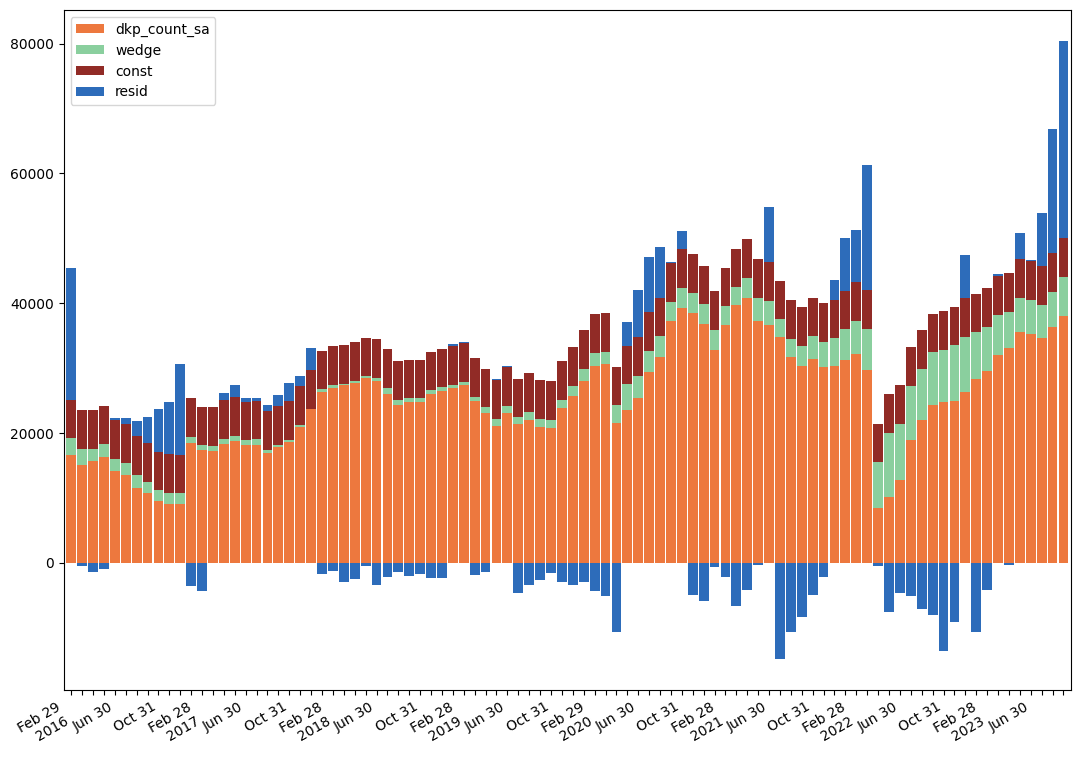

In [98]:
decompos_plot(result, abs_data[['dkp_count_sa',
                     'wedge',
                     'const']],
             color = ['#ed783e', '#8acf9e', '#912b26', '#2d6cba'])

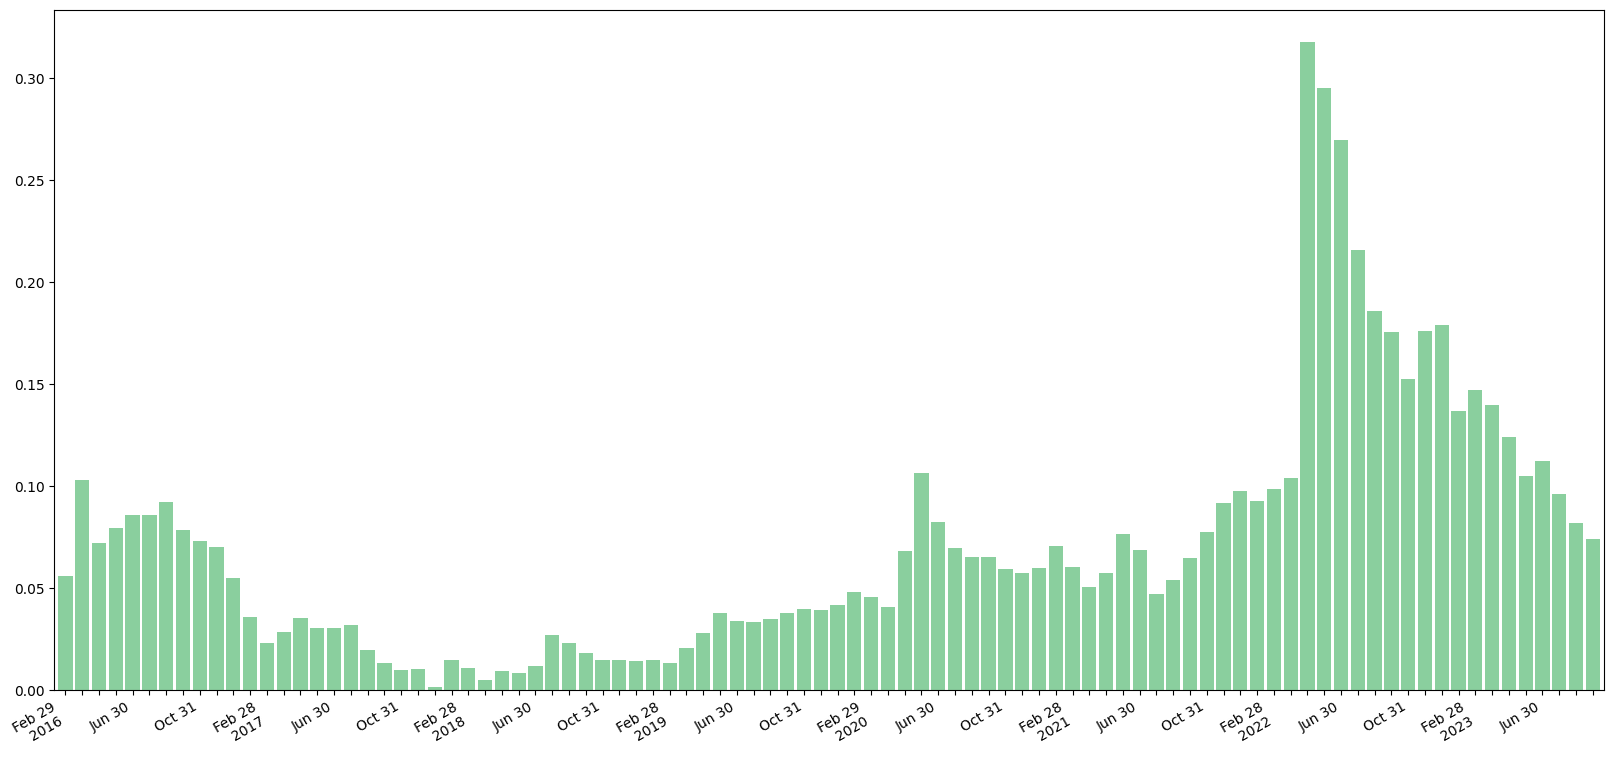

In [99]:
# доля объяснеемая wedge
explanation(result, abs_data[['dkp_count_sa',
                     'wedge',
                     'const']],'wedge')

### С лагом

In [100]:
# модель, робастные стандартные ошибки
# можем менять зависимые переменные
model = sm.OLS(abs_data['ddu_count_sa'],
               abs_data[['dkp_count_sa',
                     'ddu_count_sa_lag',
                     'wedge',
                     'const']])

result = model.fit()
print(result.get_robustcov_results(cov_type='HC1').summary())
#print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           ddu_count_sa   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     35.67
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           3.52e-15
Time:                        11:53:03   Log-Likelihood:                -936.99
No. Observations:                  92   AIC:                             1882.
Df Residuals:                      88   BIC:                             1892.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
dkp_count_sa         0.1943      0.055  

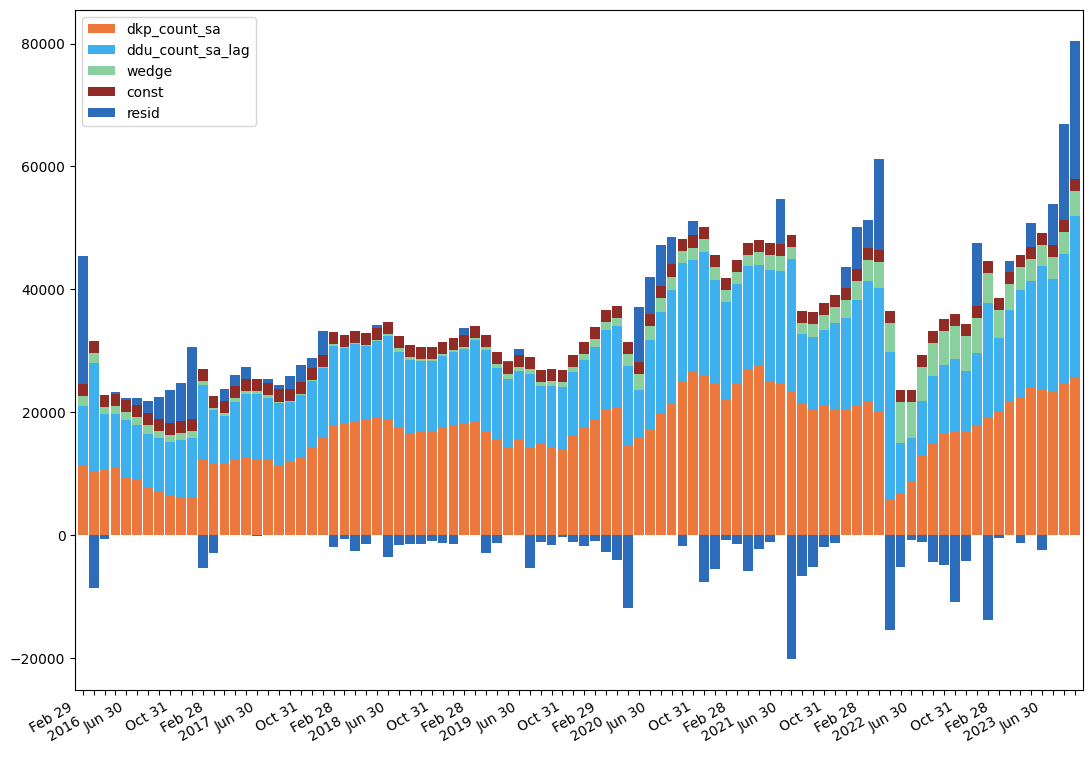

In [101]:
decompos_plot(result, abs_data[['dkp_count_sa',
                     'ddu_count_sa_lag',
                     'wedge',
                     'const']])

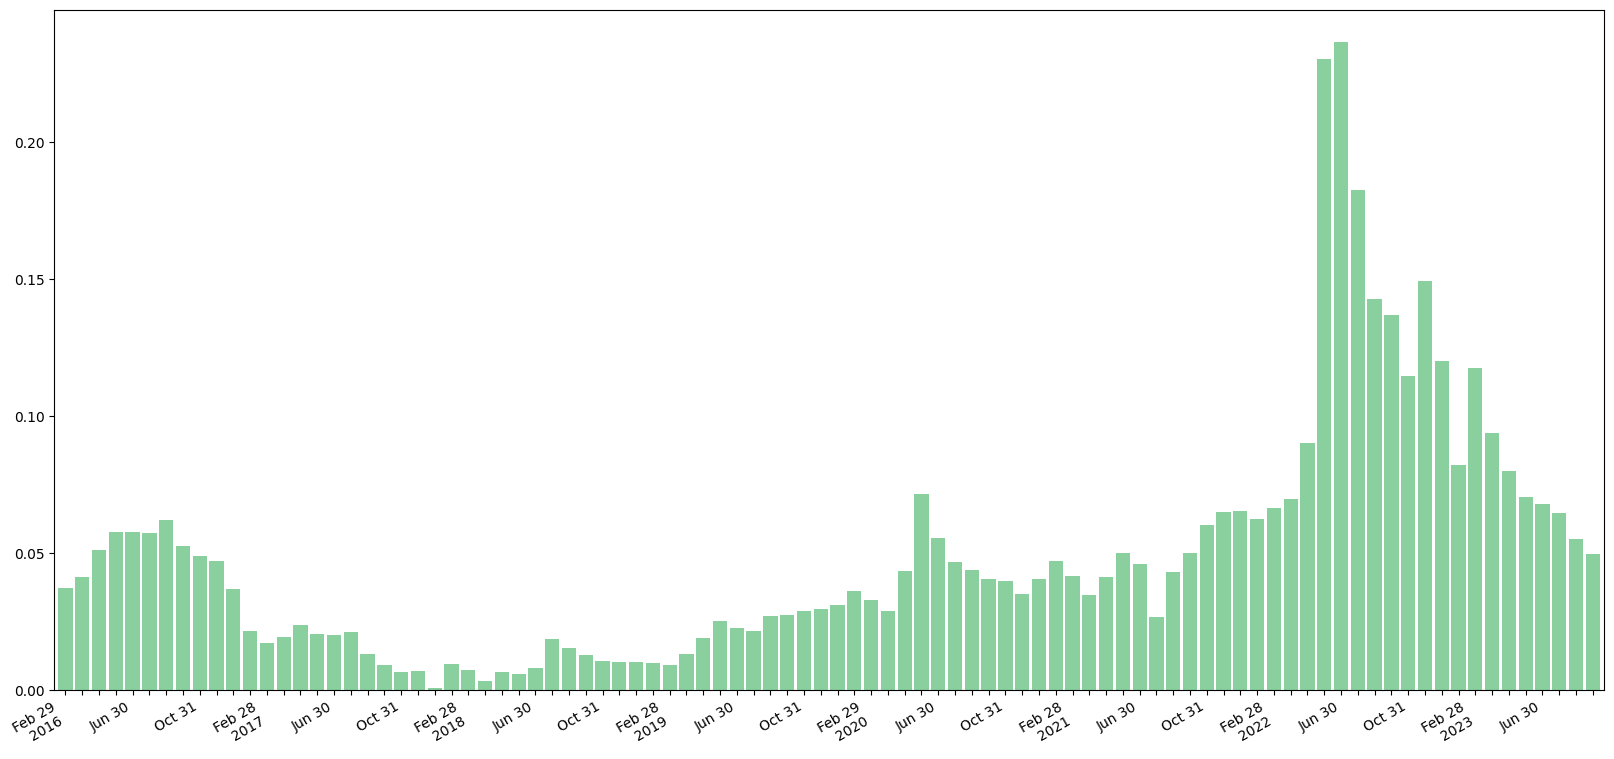

In [102]:
# доля объяснеемая wedge
explanation(result, abs_data[['dkp_count_sa',
                     'ddu_count_sa_lag',
                     'wedge',
                     'const']],'wedge')

Переменная wedge объясняет от 5% до 25% колебаний в продажах на первичном рынке в различные периоды времени в модели с лагом и без. Коэффициент при переменной значим

## Rolling  window regression

Rolling regression - вид моделей для анализа изменения зависимости между переменными во времени. В них используется линейная регрессия, но при этом набор данных может изменяться во времени. В большинстве моделей линейной регрессии предполагается, что параметры инвариантны во времени и, следовательно, не должны изменяться с течением времени. Rolling regression оценивают параметры модели с использованием фиксированного временного окна по всему набору данных. Таким образом мы можем попытаться уловить структурные изменения в данных и оценить среднее влияние разницы в ставках.

### Без лага

In [103]:
# можем менять переменные
roll_reg = RollingOLS(abs_data['ddu_count_sa'],
                      abs_data[['dkp_count_sa',
                            'wedge',
                            'const']],
                             window=36)
result = roll_reg.fit()

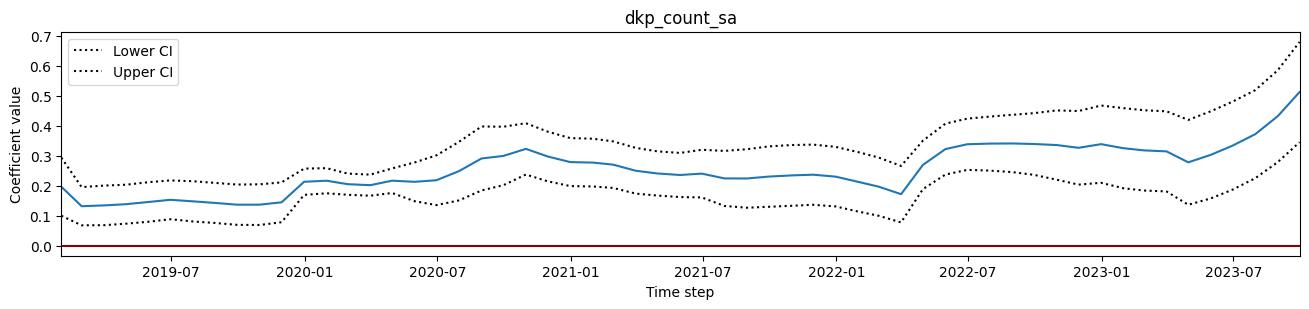

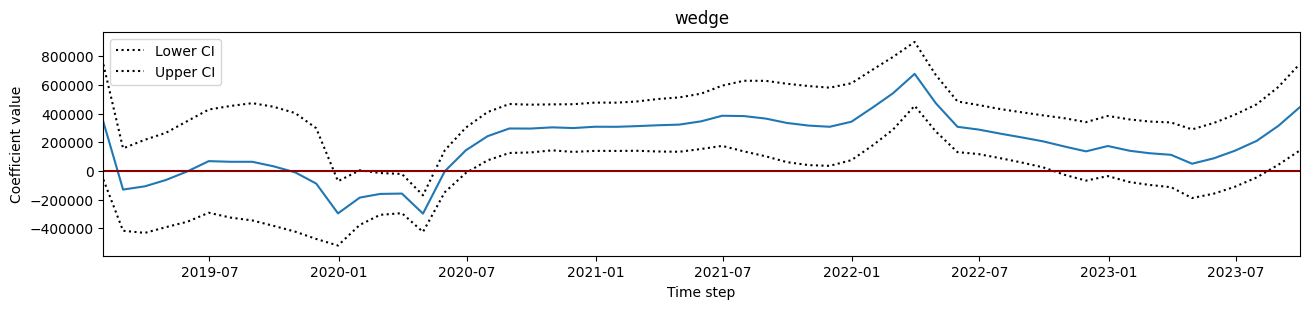

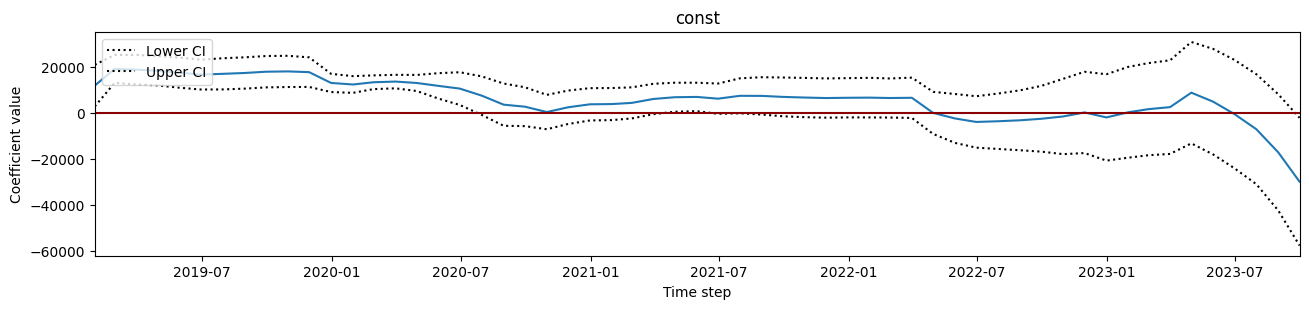

In [104]:
# график изменения коэффициентов во времени
for name in ['dkp_count_sa',
            'wedge',
            'const']:
    fig = result.plot_recursive_coefficient(variables=[name], figsize=(13,3))
    plt.xlabel('Time step')
    plt.ylabel('Coefficient value')
    plt.axhline(0, color='darkred')
    plt.show()

In [105]:
# данные для графика
for_plot = (np.array(result.params) * abs_data[['dkp_count_sa',
                            #'ddu_count_sa_lag',
                            'wedge',
                            'const']]).dropna()
# добавили остатки т.к. нет встроенного метода для RR
for_plot['resid']=abs_data.loc[for_plot.index[0]:,'ddu_count_sa']-for_plot.sum(axis=1)

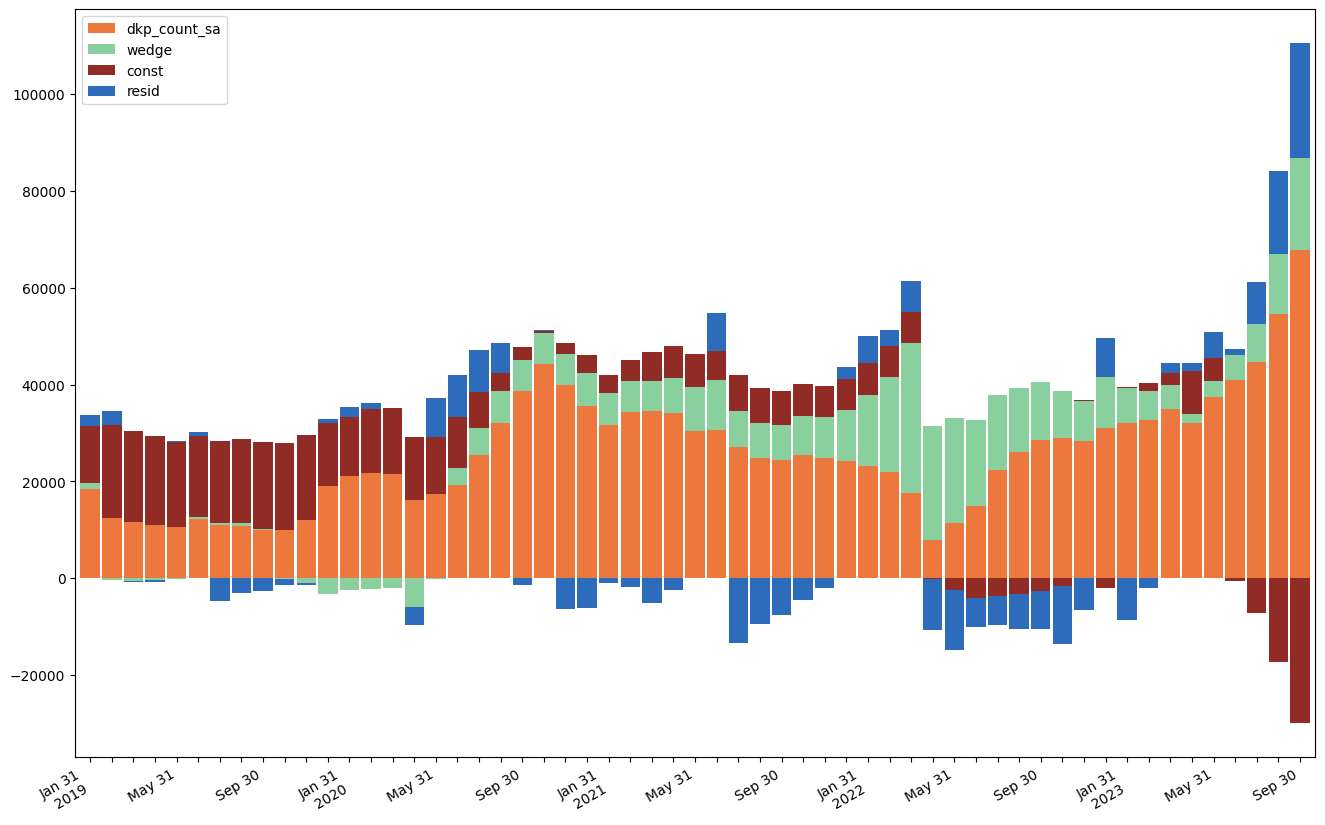

In [106]:
# график для rolling regression
ax = for_plot.plot(figsize = (16,11),
              kind='bar',
              stacked=True,
              width=0.9,
              rot=0,
              color = ['#ed783e', '#8acf9e', '#912b26', '#2d6cba']);
              #colormap='Spectral')
beautiful_xticks(ax, for_plot)

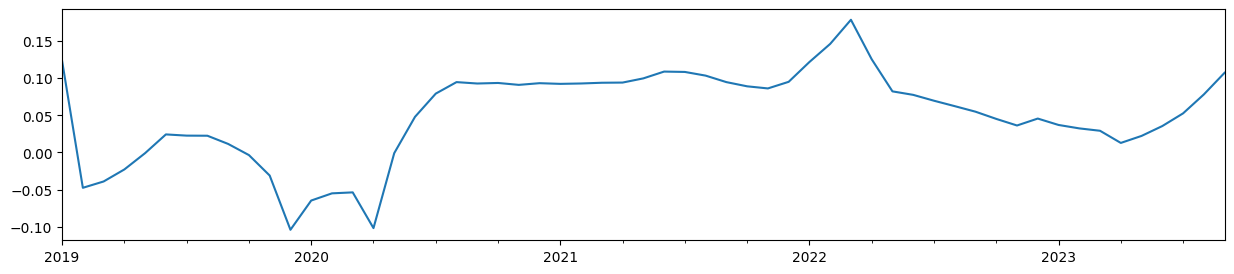

In [107]:
# процентное влияние
(result.params['wedge'].dropna() * 0.01 / \
                       abs_data['ddu_count_sa'].rolling(window=36).mean().dropna()) \
                        .plot(figsize=(15,3));


### С лагом

In [108]:
# можем менять переменные
roll_reg = RollingOLS(abs_data['ddu_count_sa'],
                      abs_data[['dkp_count_sa',
                            'ddu_count_sa_lag',
                            'wedge',
                            'const']],
                             window=36)
result = roll_reg.fit()

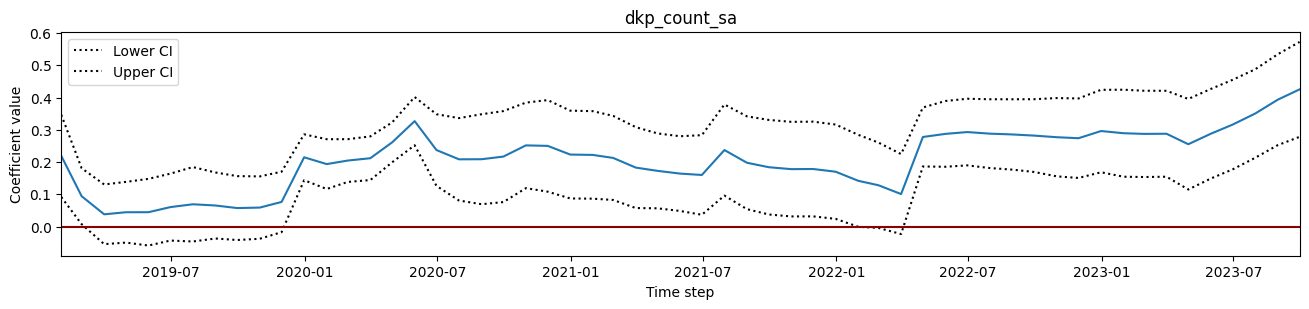

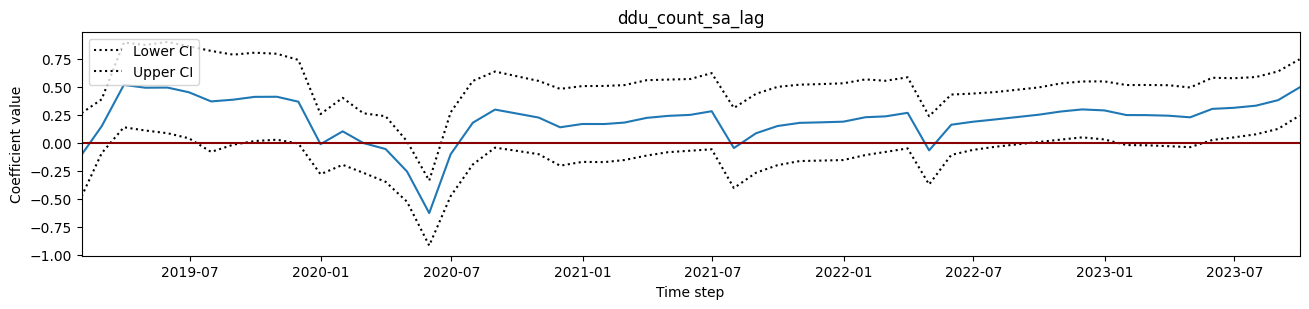

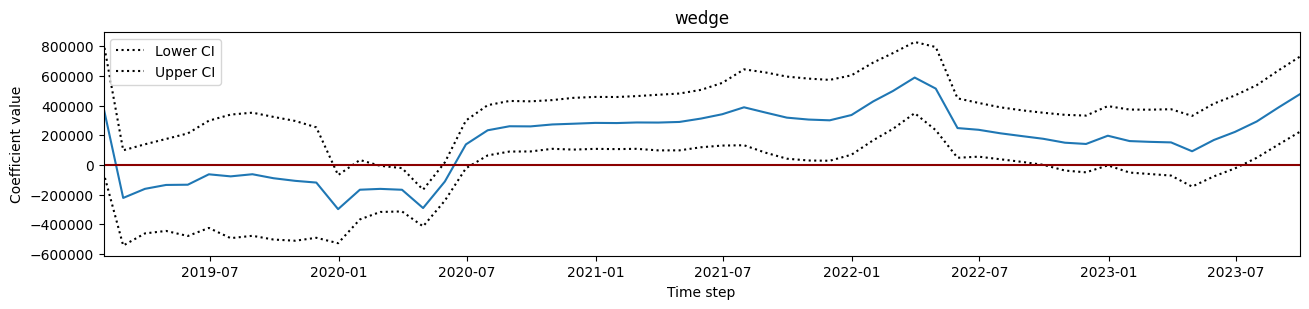

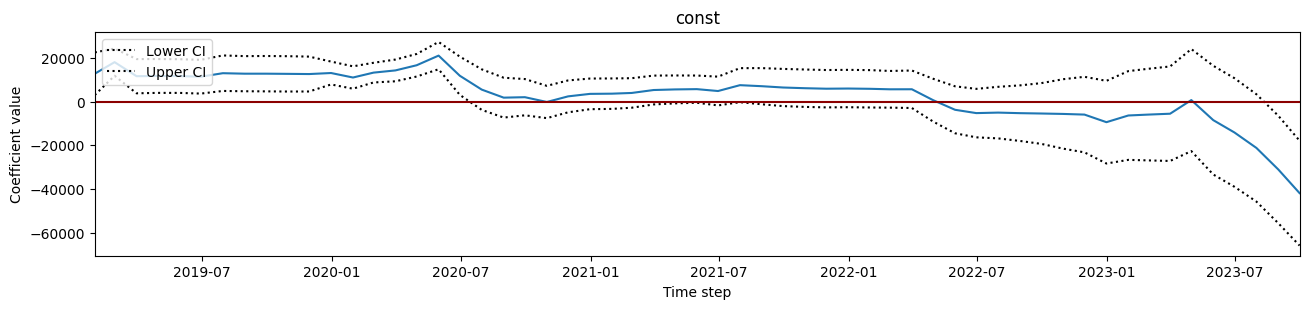

In [109]:
# график изменения коэффициентов во времени
for name in ['dkp_count_sa',
            'ddu_count_sa_lag',
            'wedge',
            'const']:
    fig = result.plot_recursive_coefficient(variables=[name], figsize=(13,3))
    plt.xlabel('Time step')
    plt.ylabel('Coefficient value')
    plt.axhline(0, color='darkred')
    plt.show()

In [110]:
# данные для графика
for_plot = (np.array(result.params) * abs_data[['dkp_count_sa',
                            'ddu_count_sa_lag',
                            'wedge',
                            'const']]).dropna()
# добавили остатки т.к. нет встроенного метода для RR
for_plot['resid']=abs_data.loc[for_plot.index[0]:,'ddu_count_sa']-for_plot.sum(axis=1)

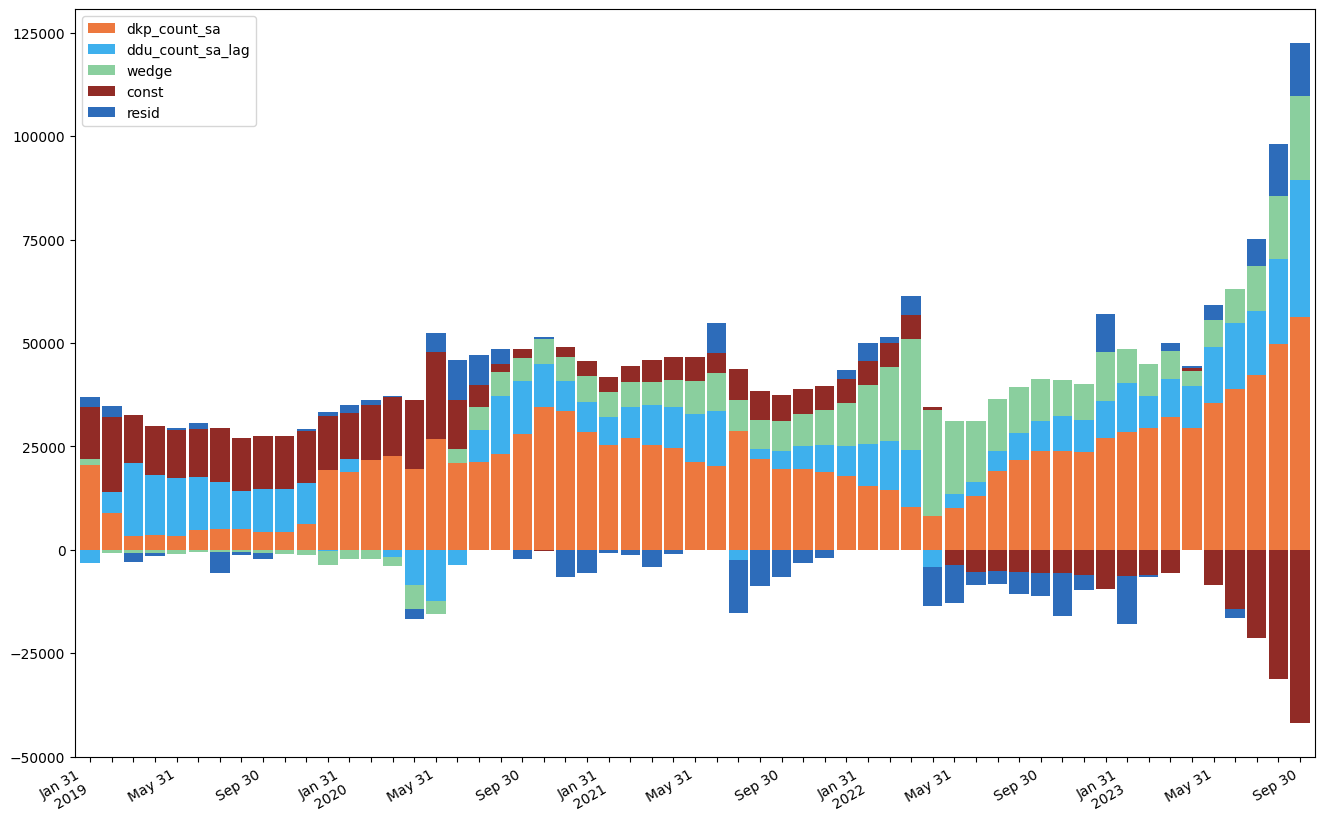

In [111]:
# график для rolling regression
ax = for_plot.plot(figsize = (16,11),
              kind='bar',
              stacked=True,
              width=0.9,
              rot=0,
              color = ['#ed783e', '#3eb0ed', '#8acf9e','#912b26', '#2d6cba']);
              #colormap='Spectral')
beautiful_xticks(ax, for_plot)

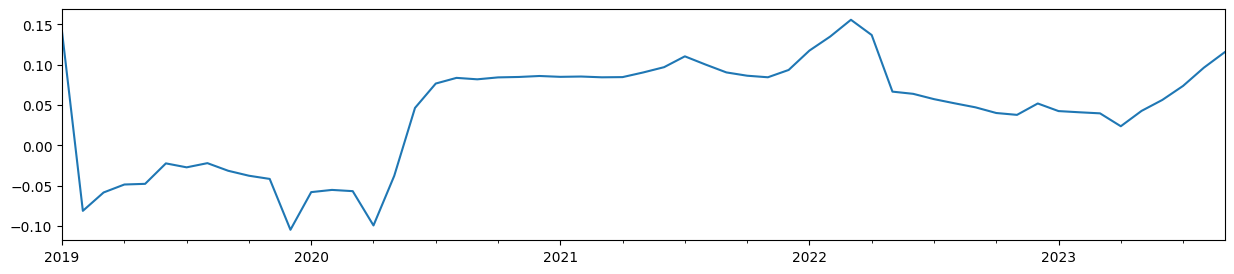

In [112]:
# процентное влияние
(result.params['wedge'].dropna() * 0.01 / \
                       abs_data['ddu_count_sa'].rolling(window=36).mean().dropna()) \
                        .plot(figsize=(15,3));


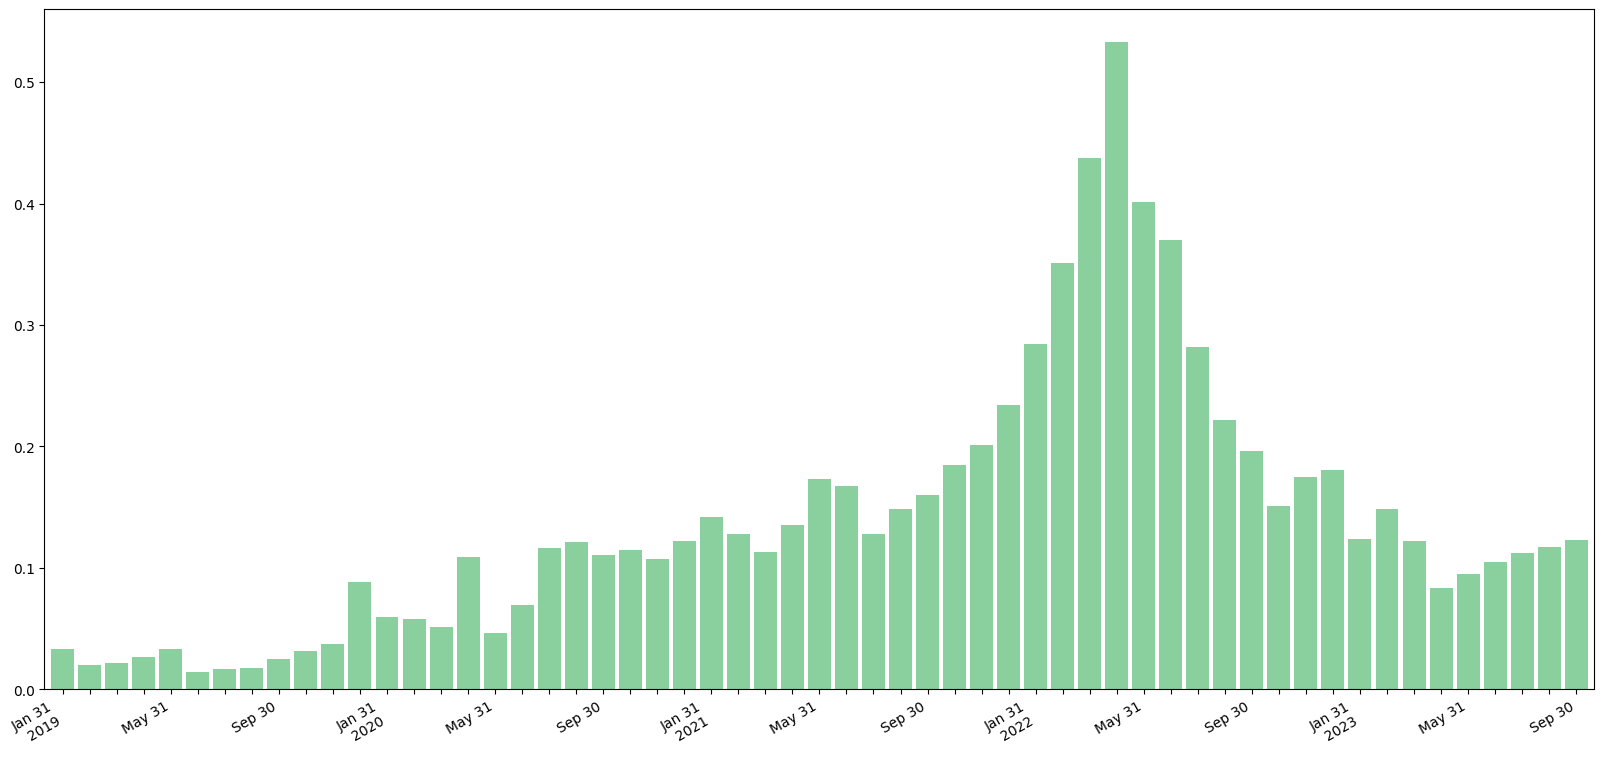

In [113]:
# объясняемая доля разницы в ставках
ax = (abs(for_plot['wedge']) / for_plot.abs().sum(axis=1)).plot(kind='bar',
                                                figsize=(20,10),
                                                width = 0.85,
                                                color = '#8acf9e');
beautiful_xticks(ax, for_plot)

При увеличении разницы в ставках на 1 п.п. продажи на первичном рынке увеличиваются в среднем при прочих равных условиях на 7%. Но в зависимиости от периода влияние может увеличиваться до 15% и сокращаться до 4%. Совокупный вклад разницы в ставках в период весны 2022 года достиагал более 50%, а в среднем составлял около 15%. Преимущество данного метода оценки заключается в том, что он способен учитывать структурные изменения и возможность изменения степени зависимости (коэффициента) во времени.

## Вывод

Мы провели исследование влияния разницы в ставках по ипотеке на превичном и вторичном рынке (которая является хорошим приближением действия льготных программ). Нами были предложены и описаны несколько подходов к исследованию, были описаны сильные и слабые стороны методов оценки и моделей.

**Основные выводы:**
- Разницы в ставках на ипотечном рынке подвержены структурным изменениям во времени
- Разница объясняет в среднем от 5% до 50% всех продаж в зависимости от периода времени, а увеличение ставки на 1 п.п. увеличивает продажи в среднем от 5% до 15%
- Если бы льготных программ не было, то в некоторые периоды времени рынок мог бы столкнуться с острым дефицитом спроса
- В ближайшее время мы ожидаем роста влияния разницы в ставках из-за повышения ключевой ставки ЦБ
- В дальенйшей сфере исследований можно сосредоточиться на использовании TVP моделей или моделей временных рядов